# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [17]:
# H_0 = Your null hypothesis

#Null Hypothesis H_0:The new email template will not significantly increase the response rate compared to the current template. 
p_new = 0.06 # (response rate for the new email template)
p_current = 0.05 # (the current response rate)

H_0: p_new <= p_current 

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [19]:
# H_1 = Your alternative hypothesis
H_1: p_new > p_current

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [39]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.power import NormalIndPower

# Step 1: Define the current and new response rates
p_current = 0.05  # Current response rate
p_new = 0.06      # New response rate

# Step 2: Define alpha and power
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Step 3: Calculate Cohen's d using pooled standard deviation
def cohen_d(p1, p2):
    pooled_variance = p1 * (1 - p1) + p2 * (1 - p2)  # Pooled variance
    pooled_std = np.sqrt(pooled_variance)  # Pooled standard deviation
    return (p2 - p1) / pooled_std  # Effect size using pooled standard deviation

# Calculate effect size
effect_size = cohen_d(p_current, p_new)
print(f"Effect size (Cohen's d): {effect_size:.4f}")

# Step 4: Calculate required sample size using solve_power
power_analysis = NormalIndPower()
required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Print the required sample size
print(f"Required sample size to detect a 1% increase in response rate: {int(np.ceil(required_sample_size))}")


Effect size (Cohen's d): 0.0310
Required sample size to detect a 1% increase in response rate: 16310


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

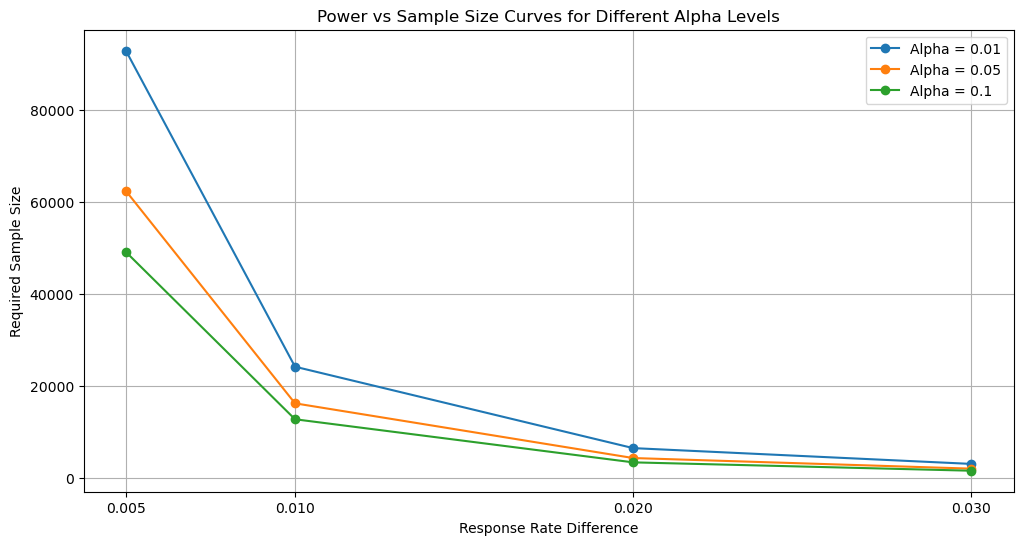

In [50]:
import matplotlib.pyplot as plt
# Step 1: Define parameters
alpha_values = [0.01, 0.05, 0.1]  # Different significance levels
response_rate_differences = [0.005, 0.01, 0.02, 0.03]  # Varying response rate differences
# Step 2: Initialize NormalIndPower
power_analysis = NormalIndPower()

# Step 3: Calculate required sample sizes for each combination of alpha and response rate difference
sample_sizes = {}

for alpha in alpha_values:
    sample_sizes[alpha] = []
    for d in response_rate_differences:
        # Calculate new response rate
        p_new = p_current + d
        # Calculate effect size using Cohen's d
        effect_size = (p_new - p_current) / np.sqrt(p_current * (1 - p_current) + p_new * (1 - p_new))
        # Calculate required sample size
        required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
        sample_sizes[alpha].append(required_sample_size)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

for alpha in alpha_values:
    plt.plot(response_rate_differences, sample_sizes[alpha], marker='o', label=f'Alpha = {alpha}')

plt.title('Power vs Sample Size Curves for Different Alpha Levels')
plt.xlabel('Response Rate Difference')
plt.ylabel('Required Sample Size')
plt.xticks(response_rate_differences)  # Set x-ticks to be the response rate differences
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

# Proposed Experimental Design

## 1. Objective
To evaluate the effectiveness of a new email template on improving response rates compared to the current email template.

## 2. Experimental Design
- **Design Type**: A/B Test (Randomized Controlled Trial)
- **Groups**: 
  - **Group A (Control)**: Receives the current email template with a 5% response rate.
  - **Group B (Treatment)**: Receives the new email template, hypothesized to improve the response rate by 1%.
  
- **Sample Size**: Based on the power analysis conducted, we will determine the appropriate sample size needed to detect a 1% increase in response rate with a significance level (alpha) of 0.05 and a power of 0.8. For example, if our analysis suggests 4000 participants per group, we will recruit a total of 8000 participants.

- **Randomization**: Participants will be randomly assigned to one of the two groups to minimize bias and ensure that the groups are comparable.

- **Duration**: The experiment will run for a specific period (e.g., 2 weeks) to allow sufficient time for participants to respond to the emails.

## 3. Data Collection
- **Response Rate**: The primary metric will be the response rate (number of positive responses divided by total emails sent).
- **Secondary Metrics**: 
  - Engagement metrics (click-through rates, open rates)
  - Revenue generated from responses (if applicable)

## 4. Data Analysis
- A two-tailed hypothesis test will be conducted to determine if there is a statistically significant difference between the response rates of the two groups.
- Effect size will be calculated to understand the magnitude of the difference, using Cohen's \(d\).

## 5. Advantages
- **Clear Comparison**: The A/B test design allows for a straightforward comparison between the two email templates, making it easy to interpret results.
- **Randomization**: Reduces biases by ensuring that external factors are evenly distributed across both groups.
- **Statistical Rigor**: With a predetermined sample size and analysis plan, the experiment will adhere to rigorous statistical standards, enhancing the credibility of the results.

## 6. Disadvantages
- **Risk of Failure**: If the new email template does not perform significantly better than the current one, the company may hesitate to adopt it, which could be disappointing for the team involved in its development.
- **Resource Intensive**: Recruiting and managing a large sample size may require substantial resources, including time and budget.
- **Potential for External Factors**: Other variables (e.g., seasonal trends, market conditions) may influence response rates and confound the results if not properly controlled.

## 7. Conclusion
This experimental design aims to provide clear evidence on the effectiveness of the new email template, allowing the marketing team to make data-driven decisions. By weighing the advantages against the disadvantages, we can present a well-rounded approach that aligns with the company's goals and resources. 

## 8. Next Steps
- Discuss the proposed design with stakeholders to gather feedback.
- Finalize the logistics for the experiment, including participant recruitment strategies and data collection methods.
- Prepare the marketing team for the implementation of the new email template based on the results of the experiment.


## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.